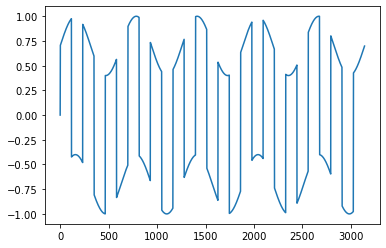

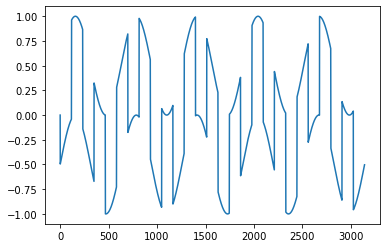

array([[ 0.        ,  0.70299995,  0.7059996 , ...,  0.69222291,
         0.69522224,  0.69822205],
       [ 0.        , -0.49500008, -0.49000067, ..., -0.51296182,
        -0.50796293, -0.50296325]])

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X1 = []
for line in open('dat1.txt', 'r'):
    values = [float(s) for s in line.split()]
    X1.append(values[0])

plt.plot(X1)
plt.show()

X2 = []
for line in open('dat2.txt', 'r'):
    values = [float(s) for s in line.split()]
    X2.append(values[0])
    
plt.plot(X2)
plt.show()

x1 = np.asarray(X1)
x2 = np.asarray(X2)
X = np.vstack((x1, x2))
X

In [2]:
def mean(X):
    E = np.zeros((len(X),1))
    for i in range (0, len(X)):
        total = 0
        for j in range (0, len(X[i])):
            total = total + X[i][j]
        mean = total / len(X[i])
        E[i][0] = mean
    return E

In [3]:
E = mean(X)
mean(X-E)

array([[-5.57231607e-17],
       [ 7.16238724e-17]])

In [4]:
def sigma(X):
    a,b = X.shape
    temp = np.transpose(X)
    c,d = temp.shape
    sum = np.zeros((a,a))
    for i in range (0, c):
        x = np.zeros((d,1))
        for j in range(0, d):
            x[j][0] = temp[i][j]
        sum = sum + np.matmul(x, np.transpose(x))
    return sum / b

In [5]:
sigma(X-E)
d, e = np.linalg.eig(sigma(X-E))
print(d)
print(e)

[0.74009639 0.16858705]
[[ 0.79997641  0.60003145]
 [-0.60003145  0.79997641]]


In [6]:
def eigval_mat(d, I):
    for i in range (0, len(d)):
        I[i] = I[i] * d[i]
    return I

In [7]:
a, b = X.shape
D = eigval_mat(d, np.identity(a))
D

array([[0.74009639, 0.        ],
       [0.        , 0.16858705]])

In [8]:
def pow_diag(D, n):
    for i in range (0, len(D)):
        for j in range(0, len(D[i])):
            if i == j:
                D[i][j] = D[i][j] ** n
    return D

In [9]:
pow_diag(D, -0.5)
D

array([[1.16240068, 0.        ],
       [0.        , 2.43549866]])

In [10]:
V = np.matmul(np.matmul(e, D), np.transpose(e))
V

array([[1.620764  , 0.61110104],
       [0.61110104, 1.97713534]])

In [11]:
Z = np.matmul(V, X-E)
sigma(Z)

array([[ 1.00000000e+00, -2.35989529e-15],
       [-2.35989529e-15,  1.00000000e+00]])

In [12]:
def ortho(W):
    for i in range (0, len(W)):
        W[i] = W[i]/np.linalg.norm(W[i])
    return W

In [13]:
def update(W): #W = 2x2 = [[w1T],[w2T]]
    for k in range(0, len(W)):
        res = np.zeros((len(W),1))
        total = np.zeros((len(W),1))
        for i in range(0, len(X[0])):
            D = np.zeros((1,1))
            E = np.zeros((1,1))
            K = np.zeros((len(W),1))
            z = np.zeros((len(W),1))
            for j in range(0, len(W)):
                z[j][0] = Z[j][i]
            D = np.matmul(np.asarray([W[k]]),z)
            E = D ** 3
            K = np.matmul(z,E)
            total = total + K
        res = total / float(len(X[0]))
        W[k] = np.transpose(res - np.transpose(float(3) * np.asarray([W[k]])))
        if (W[k][0]<0):
            W[k] = -W[k]
    return W

In [14]:
def boushi(W):
    if all(np.abs(np.abs(W[0])-np.abs(W[1])) < np.array((1e-5,1e-5))):
        W[1] = np.random.rand(1,2) #special for (2,2)

def kurtosis(Y):
    kur = np.zeros((len(Y),1))
    kur = mean(Y**4)-3*(mean(Y**2)**2)
    return kur

In [15]:
def ICA(Z):
    print('START\n')
    W = np.random.rand(2,2)
    ortho(W)
    Y1 = np.matmul(W, Z)
    print(W)
    update(W)
    boushi(W)
    ortho(W)
    Y2 = np.matmul(W, Z)
    print('kurtY1:',kurtosis(Y1))
    print('kurtY2:',kurtosis(Y2),'\n')
    while any(np.abs(kurtosis(Y1)) < np.abs(kurtosis(Y2))):
        print('Next cycle:\n')
        ortho(W)
        Y1 = np.matmul(W, Z)
        print('W:',W)
        update(W)
        ortho(W)
        Y2 = np.matmul(W, Z)
        boushi(W)
        print('kurtY1:',kurtosis(Y1))
        print('kurtY2:',kurtosis(Y2),'\n')
    print('END\n')
    return Y2

START

[[0.66269179 0.74889225]
 [0.84752855 0.53074981]]
kurtY1: [[-1.44990308]
 [-1.09744211]]
kurtY2: [[-1.49979918]
 [-1.46356988]] 

Next cycle:

W: [[0.56133086 0.82759149]
 [0.64788938 0.76173444]]
kurtY1: [[-1.49979918]
 [-1.46356988]]
kurtY2: [[-1.49980568]
 [-1.49980483]] 

Next cycle:

W: [[0.56010411 0.82842222]
 [0.56055879 0.82811463]]
kurtY1: [[-1.49980568]
 [-1.49980483]]
kurtY2: [[-1.49980569]
 [-1.49980569]] 

Next cycle:

W: [[0.56011841 0.82841256]
 [0.1779974  0.98403096]]
kurtY1: [[-1.49980569]
 [-1.0987879 ]]
kurtY2: [[-1.49980569]
 [-1.4645995 ]] 

Next cycle:

W: [[0.56011824 0.82841267]
 [0.46697302 0.88427156]]
kurtY1: [[-1.49980569]
 [-1.4645995 ]]
kurtY2: [[-1.49980569]
 [-1.4998051 ]] 

Next cycle:

W: [[0.56011824 0.82841267]
 [0.55975454 0.82865847]]
kurtY1: [[-1.49980569]
 [-1.4998051 ]]
kurtY2: [[-1.49980569]
 [-1.49980569]] 

Next cycle:

W: [[0.56011824 0.82841267]
 [0.84715339 0.53134841]]
kurtY1: [[-1.49980569]
 [-1.09842388]]
kurtY2: [[-1.49980569

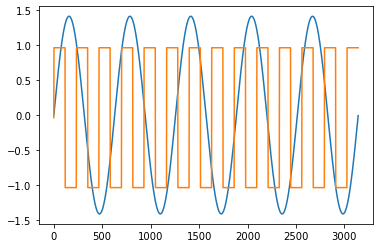

In [16]:
Y = ICA(Z)
for i in range (0, len(Y)):
    plt.plot(Y[i])
plt.show()